In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Data From: https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0049171.g004


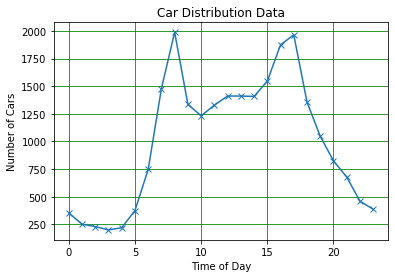

In [173]:
xData = np.linspace(0,23, 24)
days = np.array([350, 250, 230, 200, 220, 375, 750, 1475, 1975, 1312, 1208, 1300, 1385, 1385, 1350, 1480, 1800, 1875, 1260, 980, 775, 650, 440, 375])
friday = np.array([375, 260, 230, 200, 220, 375, 730, 1500, 2063, 1475, 1375, 1500, 1563, 1565, 1750, 1937, 2313, 2500, 1937, 1450, 1125, 850, 583, 458])
yData = ((6*days) + friday)/7

print("Data From: https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0049171.g004")
plt.figure()
plt.title("Car Distribution Data")
plt.plot(xData, yData, linestyle='-', marker ='x')
plt.xlabel("Time of Day")
plt.ylabel("Number of Cars")
plt.grid(color = 'g')
plt.show()

So assuming this is the PMF (Called it a PDF in the e-mail but pretty sure it's a PMF (Probability Mass Function)) for the amount of traffic for each hour of the day.
I'm going to try and get something to sample it and get a distribution which follows it.

Firstly i'll interpolate it though to get a better resolution, which you could play around with later

In [174]:
from scipy.interpolate import interp1d

In [175]:
nsecondsinday = 24*3600

xData = np.linspace(0,24, 24)

# 1 second
x_range = np.arange(0, nsecondsinday, 1)

# 1 milisecond
#x_range = np.arange(0, nsecondsinday, 1e-3)

In [57]:
y_new = interp1d(xData*3600, yData)(x_range)

Now we've got this to a 1 second resolution

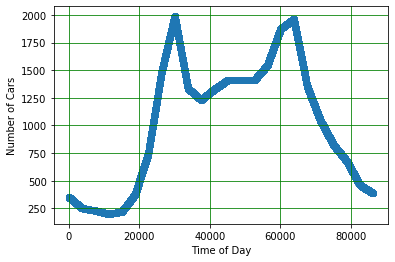

In [59]:
plt.scatter(x_range, y_new)
plt.xlabel("Time of Day")
plt.ylabel("Number of Cars")
plt.grid(color = 'g')
plt.show()

So how many cars can we expect for each time step?

To make this a true PMF, the area under the curve has to be equal to 1 (normalisation), so we can just divide by the sum:

In [61]:
y_norm = y_new/y_new.sum()

print(y_norm.sum())

0.9999999999999999


Close enough..

So if we look at the PMF now it has the same shape as before but the y coordinates are much lower to reflect the relative probability of the number of cars at each time of day

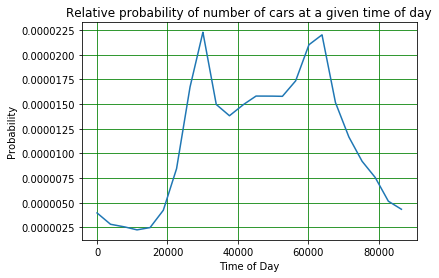

In [83]:
plt.title("Relative probability of number of cars at a given time of day")
plt.plot(y_norm)
plt.xlabel("Time of Day")
plt.ylabel("Probability")
plt.grid(color = 'g')
plt.show()

Now we want to check if we get a car at every second. We can do this by checking against a randomly generated number.

In [93]:
results = np.array([1 if prob < np.random.random(1) else 0 for prob in y_norm])

We can run this for a bunch of test "days"

In [166]:
# This bit is just to take every 500th value in the array because otherwise it takes ages to run
y_norm_sub = y_norm[1::500]

results = np.array([[1 if prob < np.random.random(1)/0.5 else 0 for prob in y_norm_sub] for _ in range(200)])

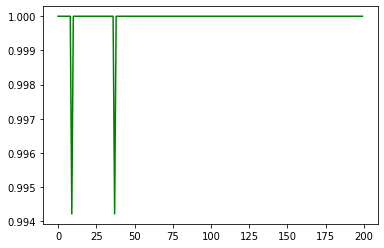

In [165]:
mean = results.mean(axis = 1)

plt.plot(mean, c = "g")

The vast majority of these (if not all depending on your random seed) should be 1s. This is because we forgot something..

In [170]:
# This bit is just to take every 500th value in the array because otherwise it takes ages to run
y_norm_sub = y_norm[1::500]

results = np.array([[1 if prob > np.random.random(1)/len(y_norm)/0.5 else 0 for prob in y_norm_sub] for _ in range(2000)])

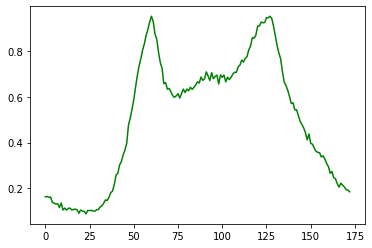

In [171]:
mean = results.mean(axis = 0)

plt.plot(mean, c = "g")

So this is now a sampled distribution of your original one

So you'd want something like this in your simulation:

In [215]:
seconds_norm = seconds/seconds.sum()

for i in range(1000):

    new_car_chance = seconds[i]
    random = np.random.random(1)/len(seconds)

    if random < new_car_chance:   #compares to the chance of a new car
        print("New car")
        
    else:
        
        print("No new car")

New car
No new car
No new car
New car
No new car
New car
No new car
No new car
New car
No new car
No new car
No new car
No new car
No new car
New car
No new car
No new car
No new car
New car
No new car
No new car
No new car
No new car
New car
No new car
No new car
No new car
No new car
No new car
New car
New car
No new car
New car
New car
New car
New car
No new car
New car
No new car
No new car
New car
No new car
New car
No new car
No new car
No new car
No new car
New car
New car
No new car
New car
No new car
No new car
No new car
No new car
New car
No new car
New car
No new car
New car
No new car
No new car
No new car
New car
No new car
No new car
New car
New car
New car
No new car
No new car
New car
New car
No new car
No new car
No new car
No new car
No new car
No new car
New car
No new car
New car
New car
No new car
New car
New car
New car
No new car
No new car
New car
No new car
New car
No new car
No new car
No new car
New car
No new car
New car
No new car
New car
No new car
New ca